# Summary - Exploratory Data Analysis for Machine Learning Assesment
Access to Safe drinking water is eassently a global issue. The World Health Organization (WHO) estimates that half of all people in the world are affected by the lack of safe drinking water.
With this assesment, we will explore the data and look for patterns in the data to analyze if the given data is a good indicator of safe drinking water.

In [18]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_context('notebook')

## Data Set
The dataset is downloaded from kaggle.com and is available for download at:

https://www.kaggle.com/adityakadiwal/water-potability

# EDA - Exploratory Data Analysis
In this section we will explore the data and look for patterns in the data to analyze if the given data is a good indicator of safe drinking water.

1) Describe the data

2) Visualize the data

3) Identify the missing values and fill them

4) Identify the outliers and remove them

5) Identify the categorical variables and encode them (if any)

6) Identify the numerical variables and perform basic statistical analysis

In [6]:
# File is stored in github repository for easiness of access
INPUT_FILE_PATH = "https://raw.githubusercontent.com/mohameddhameem/IBM-Machine-Learning/master/Exploratory%20Data%20Analysis%20for%20Machine%20Learning/water_potability.csv"

In [7]:
# Read the csv file from the url
df = pd.read_csv(INPUT_FILE_PATH)

In [8]:
# Print the first 5 rows of the dataframe
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### More information about the data
ph - PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

Hardness - Hardness is a measure of the physical properties of the water. It is a measure of the ability of the water to support the roots and the leaves. The lower the hardness, the more support the roots and leaves can have.

Solids (Total dissolved solids - TDS) - TDS is a measure of the solids in the water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

Chloramines - Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

Sulfate - Sulfate is a common disinfectant used in public water systems. Sulfate levels up to 2 milligrams per liter (mg/L or 2 parts per million (ppm)) are considered safe in drinking water.

Conductivity - Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

Organic_carbon - Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

Trihalomethanes - THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

Turbidity - Turbidity is a measure of the water’s ability to absorb particulate matter. The lower the turbidity, the more it can absorb particulate matter.

Potability (Target variable) - Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


In [9]:
# datatypes of the columns
display(df.dtypes)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [10]:
# Describe the data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
# Check if there are any null columns
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

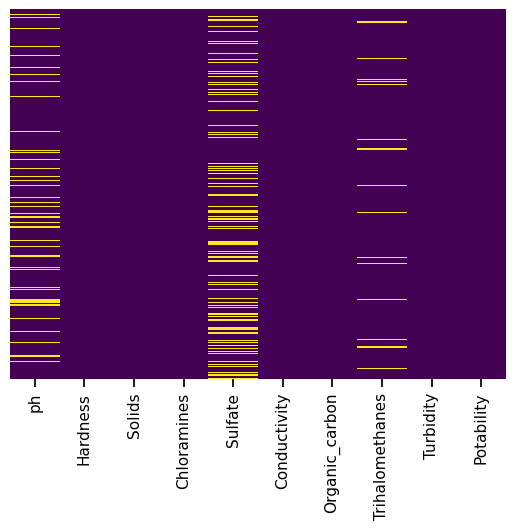

In [21]:
# Lets try to plot misisng values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Analyze ph column

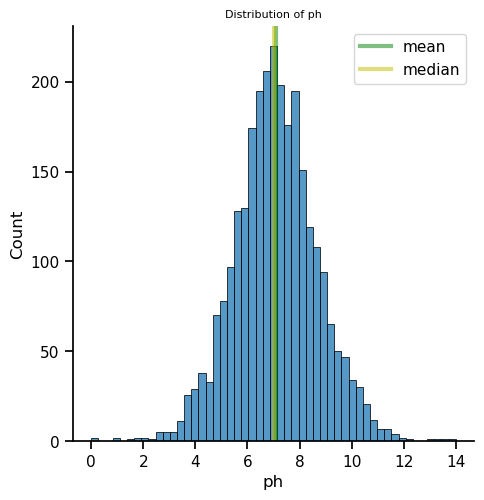

In [24]:
# for  ph column
# set the histogram, mean and median
sns.displot(df["ph"], kde=False)
plt.axvline(x=df.ph.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.ph.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("ph")
plt.ylabel("Count")
plt.title("Distribution of ph", size=8)
plt.legend(["mean", "median"])
plt.show()

 Based on the above data, we can impute ph with either mean or median. There is no skweness in the data.

### Analyze Sulfate column

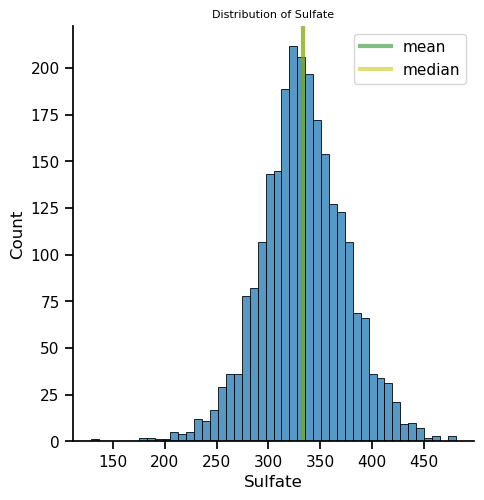

In [27]:
sns.displot(df["Sulfate"], kde=False)
plt.axvline(x=df.Sulfate.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.Sulfate.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("Sulfate")
plt.ylabel("Count")
plt.title("Distribution of Sulfate", size=8)
plt.legend(["mean", "median"])
plt.show()

Based on the above data, we can impute Sulphate with either mean or median.

### Analyze Trihalomethanes column

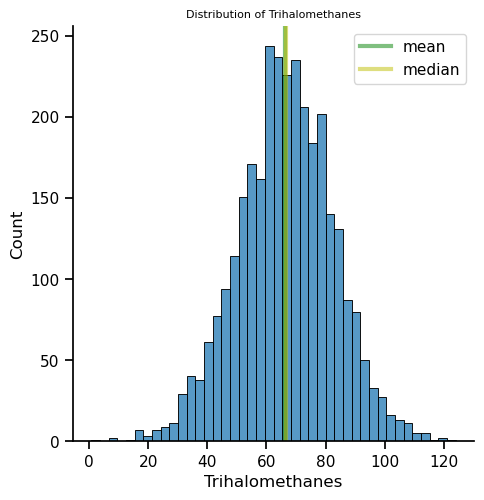

In [28]:
sns.displot(df["Trihalomethanes"], kde=False)
plt.axvline(x=df.Trihalomethanes.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.Trihalomethanes.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("Trihalomethanes")
plt.ylabel("Count")
plt.title("Distribution of Trihalomethanes", size=8)
plt.legend(["mean", "median"])
plt.show()

Based on the above data, we can impute Trihalomethanes with either mean or median.

## Missing Value imputation

#### Missing values in ph column

In [31]:
# impute missing values with mean
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

# Identify outliers in the data

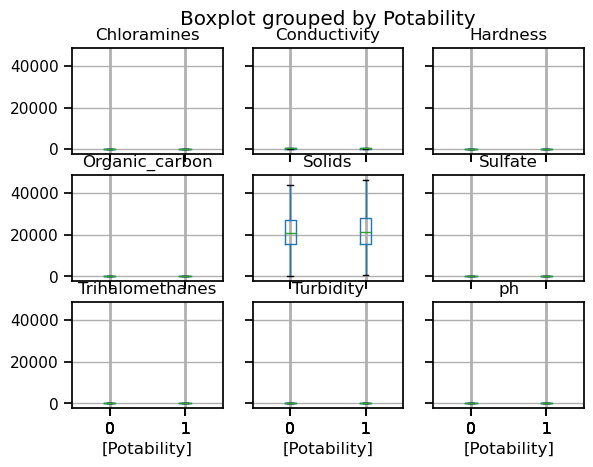

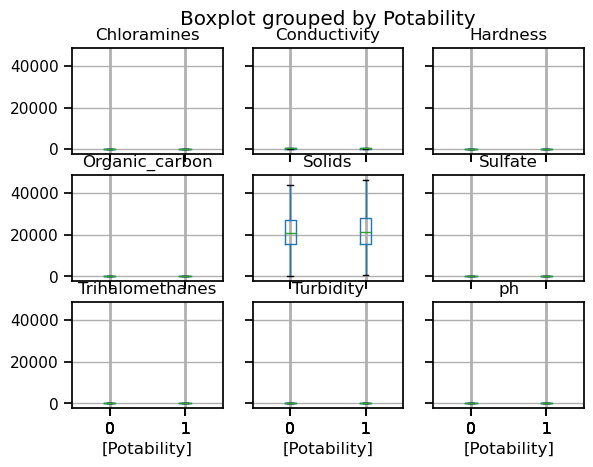

In [38]:
# check outliers
df.boxplot(by="Potability", showfliers=False)
plt.show()

## Identify corrleation between variables

In [40]:
sns.set_context('talk')
sns.pairplot(df, hue='Potability')
plt.show()